In [2]:
import pickle
import spacy
import scattertext as st
import re

import spacy
#from spacy import displacy
#from spacy.symbols import amod
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pyLDAvis
import pyLDAvis.sklearn

import pandas as pd
import numpy as np

import swat
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
#nltk.download()
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'matplotlib.pyplot'

In [3]:
def get_emotion_score(text, emotion = 'trust'):
    
    nrc_trust = nrc[nrc['sentiment'] == emotion]
    
    words = text.split()
    
    emotion_count = 0
    for word in words:
        if word in list(nrc_trust['word']):
            #print(word)
            emotion_count +=1
            
    return emotion_count

# Data Preprocessing.

### Skip this step as output pickle file is available below.

In [124]:
with open('blogger_com_data_330677_7_clean.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

In [125]:
df

,date,blogger_id,gender,age,occupation,name,post
0,"19,August,2004",4162441,male,16,Student,Sagittarius,DESTINY... you might not say a...
13,"19,August,2004",4157968,male,16,Student,Pisces,"As I strolled into the mall yesterday,..."
17,"19,August,2004",4278694,female,24,Technology,Virgo,I've never really had a blog bef...
69,"19,August,2004",4261114,female,40,indUnk,Gemini,I love to read novels. I l...
79,"19,August,2004",4215047,male,17,Student,Aquarius,today.. really a very sad day...
...,...,...,...,...,...,...,...
50463676,"12,February,1999",2999514,male,27,Engineering,Pisces,[detail] Propog...
50482996,"01,April,1999",2999514,male,27,Engineering,Pisces,[detail] I actually...
50502316,"05,June,1999",2999514,male,27,Engineering,Pisces,[detail] A tria...
50521636,"16,December,1999",2999514,male,27,Engineering,Pisces,[detail] Points...


In [48]:
df.shape

(330677, 7)

In [95]:
df_toy = df.iloc[:330677,:]

In [88]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(comment_line):
    token_words=word_tokenize(str(comment_line))
    filtered_comment_line = [w for w in token_words if not w in stop_words] 
    
    return " ".join(filtered_comment_line)

In [89]:
alphanumeric = lambda x: re.sub(r'\b[0-9]+\b\W*', '', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
#re.sub(r'\b[0-9]+\b\W*', '', text)

In [90]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma_series(string):
    return lemmatizer.lemmatize(string)
#lemma_series('aardwolves')

In [97]:
df_toy['post'] = df_toy['post'].map(remove_stop_words).map(alphanumeric).map(punc_lower)
df_toy['post'] = df_toy['post'].map(lemma_series)

In [99]:
my_stop_words_lst = ['[detail]', 'so', 's', 'it', 'he', 'its', 'she', 'we', 'n', 'm', 've']

for w in my_stop_words_lst:
    pattern = r'\b'+w+r'\b'
    custom_stop = lambda x: re.sub(pattern, ' ', x)
    df_toy['post'] = df_toy['post'].map(custom_stop)

In [101]:
analyser = SentimentIntensityAnalyzer()
def extract_polarity(text, polarity_type = 'compound'):
    all_val = analyser.polarity_scores(text)
    return all_val[polarity_type]

In [102]:
df_toy['polarity_neg_post'] = df_toy['post'].apply(extract_polarity, polarity_type = 'neg')
df_toy['polarity_pos_posts'] = df_toy['post'].apply(extract_polarity, polarity_type = 'pos')
df_toy['polarity_neu_post'] = df_toy['post'].apply(extract_polarity, polarity_type = 'neu')
df_toy['polarity_compound_post'] = df_toy['post'].apply(extract_polarity)

In [104]:
df_toy.shape

(330677, 11)

In [105]:
#intermediate saving
with open('blogger_com_data_330677_11_clean_sentiment.pkl', 'wb') as picklefile:
    pickle.dump(df_toy,picklefile)

In [274]:
df_toy = df_toy[df_toy['blogger_id'] != '113390']

In [275]:
temp = df_toy['date'].str.replace('mai', 
                                                  'May').str.replace('agosto',
                                                'August').str.replace('Junho',
                                                'June').str.replace('Juli',
                                                'July').str.replace('juin',
                                                'June').str.replace('juillet',
                                                'July').str.replace('Agosto',
                                                'August').str.replace('Julho',
                                                'July').str.replace('Setembro',
                                                'September').str.replace('Outubro',
                                                'October').str.replace('Novembro',
                                                'November').str.replace('Dezembro',
                                                'December').str.replace('Janeiro',
                                                'January').str.replace('Fevereiro',
                                                'February').str.replace('Abril',
                                                'April').str.replace('Maio',
                                                'May').str.replace('mayo', 
                                                'May').str.replace('mei', 
                                                'May').str.replace('juli', 
                                                'July').str.replace('juni', 
                                                'July').str.replace('mars', 
                                                'March').str.replace('septembre', 
                                                'September').str.replace('octobre', 
                                                'October').str.replace('novembre', 
                                                'November').str.replace('Decembre', 
                                                'December').str.replace('janvier', 
                                                'January').str.replace('avril', 
                                                'April').str.replace('febrero', 
                                                'February').str.replace('marzo', 
                                                'March').str.replace('abril',
                                                'April').str.replace('Julyo',
                                                'July')
df_toy['date'] = temp

In [276]:
temp = df_toy['date'].str.replace('septiembre', 
                                                  'September').str.replace('June1June9June,JuneAJuneuJunegJuneuJunesJunetJune,June2June0June0June4June',
                                                'June').str.replace('AugustJAugustuAugustnAugusteAugust',
                                                'August').str.replace('JulyAJulyuJulygJulyuJulysJulytJuly',
                                                'July').str.replace('NovemberJNovemberuNovemberlNovemberyNovember',
                                                'November').str.replace('octubre',
                                                'October').str.replace('noviembre',
                                                'November').str.replace('diciembre',
                                                'December').str.replace('enero',
                                                'January').str.replace('Juni',
                                                'June').str.replace('augustus',
                                                'August').str.replace('desember',
                                                'December').str.replace('augusti',
                                                'August').str.replace('toukokuu',
                                                'May').str.replace('maj',
                                                'May').str.replace('Avgust',
                                                'August').str.replace('Mai', 
                                                'May').str.replace('mei', 
                                                'May').str.replace('', 
                                                '').str.replace('Januaryyy', 
                                                'January').str.replace('maart', 
                                                'March').str.replace('septembrie', 
                                                'September').str.replace('noiembrie', 
                                                'November').str.replace('ianuarie', 
                                                'January').str.replace('februarie', 
                                                'February').str.replace('iulie', 
                                                'July').str.replace('Juuni', 
                                                'June').str.replace('Jaanuar', 
                                                'January').str.replace('Juuli', 
                                                'July').str.replace('ottobre',
                                                'October').str.replace('luglio',
                                                'July').str.replace('Aprill',
                                                'April').str.replace('giugno',
                                                'June').str.replace('lipanj',
                                                'June').str.replace('kolovoz',
                                                'August').str.replace('elokuu',
                                                'August').str.replace('Dezember',
                                                'December').str.replace('lipiec',
                                                'July').str.replace('czerwiec',
                                                'June')
df_toy['date'] = temp

In [277]:
#change these function to lambdas
def exact_correction_Januar(string):
    return re.sub(r'\bJanuar\b', 'January', string)
def exact_correction_Februar(string):
    return re.sub(r'\bFebruar\b', 'February', string)

temp1 = df_toy['date'].apply(exact_correction_Januar)
df_toy['date'] = temp1
temp2 = df_toy['date'].apply(exact_correction_Februar)
df_toy['date'] = temp2

In [278]:
temp = pd.to_datetime(df_toy['date'],  errors='coerce')
df_toy.loc[:,'date'] = temp

In [283]:
df_toy.head()

,date,blogger_id,gender,age,occupation,name,post,polarity_neg_post,polarity_pos_posts,polarity_neu_post,polarity_compound_post
0,2004-08-19,4162441,male,16,Student,Sagittarius,destiny might say anything hear chosen life pa...,0.000,0.496,0.504,0.9894
13,2004-08-19,4157968,male,16,Student,Pisces,strolled mall yesterday gently bypassing group...,0.040,0.213,0.747,0.9900
17,2004-08-19,4278694,female,24,Technology,Virgo,never really blog decided start one prepping s...,0.189,0.148,0.663,-0.6093
69,2004-08-19,4261114,female,40,indUnk,Gemini,love read novels like strong characters get sk...,0.151,0.282,0.567,0.9859
79,2004-08-19,4215047,male,17,Student,Aquarius,today really sad day nearly late found seniors...,0.192,0.203,0.605,0.0181


In [280]:
#intermediate saving
with open('blogger_com_data_330677_11_clean_sentiment.pkl', 'wb') as picklefile:
    pickle.dump(df_toy,picklefile)

In [313]:
nrc = pd.read_csv('nrc.csv')
afinn = pd.read_csv('afinn.csv')

In [315]:
get_emotion_score(df_toy.post.values[0], emotion = 'trust')

2

In [324]:
nrc_emotions = nrc['sentiment'].unique()
nrc_emotions

array(['trust', 'fear', 'negative', 'sadness', 'anger', 'surprise',
       'positive', 'disgust', 'joy', 'anticipation'], dtype=object)

In [321]:
#very computationally expensive 
nrc_emotions = nrc['sentiment'].unique()

for nrc_emotion in nrc_emotions:
    df_toy[nrc_emotion] = df_toy['post'].apply(get_emotion_score, emotion = nrc_emotion)

In [325]:
for nrc_emotion in nrc_emotions:
    df_toy[nrc_emotion] = df_toy[nrc_emotion]/len(df_toy['post'])*100

In [327]:
with open('blogger_com_data_330677_11_clean_sentiment_v_pl_normalized.pkl', 'wb') as picklefile:
    pickle.dump(df_toy, picklefile)

# Start here

In [3]:
with open('../../data/blogger_com_data_330677_11_clean_sentiment_v_pl_normalized.pkl', 'rb') as picklefile:
    df_toy = pickle.load(picklefile)

In [4]:
data_full_agg = df_toy.groupby('blogger_id').post.agg('count').reset_index().sort_values(by='post', ascending = False)
writers_100_plus = data_full_agg[data_full_agg['post'] > 600]['blogger_id']

In [7]:
writers_100_plus = data_full_agg[data_full_agg['post'] > 400]['blogger_id']
writers_100_plus

318      1270648
18910     595404
19092     780903
969      1784456
18800     449628
1699      240089
18838      49663
18920     605396
19262     942828
823      1679249
18965     665500
19304     988941
106      1093457
107      1093691
19247     919128
18872     546850
18812     470861
1731       24336
19130     808099
1417     2123946
1007      180519
19208     888601
19201     883178
18859     529513
19177     861706
868      1713442
246       122217
3305      320317
Name: blogger_id, dtype: object

In [8]:
blogger_1270648 = df_toy[df_toy['blogger_id'] =='1713442'].sort_values(by='date', ascending = True)

In [9]:
blogger_1270648

,date,blogger_id,gender,age,occupation,name,post,polarity_neg_post,polarity_pos_posts,polarity_neu_post,...,trust,fear,negative,sadness,anger,surprise,positive,disgust,joy,anticipation
11955919,2003-06-01,1713442,male,34,Education,Aquarius,here list pre eric digests this list small f...,0.027,0.097,0.876,...,0.007863,0.001814,0.003024,0.001210,0.000605,0.000605,0.008468,0.000605,0.001210,0.002722
8574919,2003-06-05,1713442,male,34,Education,Aquarius,el recreo en la escuela primaria que indica ...,0.008,0.014,0.979,...,0.002117,0.000302,0.000302,0.000000,0.000302,0.000000,0.000907,0.000000,0.000302,0.000302
11936599,2003-06-06,1713442,male,34,Education,Aquarius,como ayudar los padres prevenir el envenenamie...,0.028,0.012,0.960,...,0.000907,0.001210,0.002117,0.000907,0.000907,0.000000,0.001512,0.001512,0.000000,0.000302
11917279,2003-06-07,1713442,male,34,Education,Aquarius,los estudiantes que se mudan de escuela el log...,0.020,0.008,0.971,...,0.001210,0.000907,0.001210,0.000605,0.000605,0.000000,0.001210,0.000605,0.000605,0.000605
12013879,2003-06-08,1713442,male,34,Education,Aquarius,el juego de aparentar el desarrollo de los nin...,0.011,0.037,0.952,...,0.000605,0.000000,0.000302,0.000000,0.000000,0.000302,0.000605,0.000000,0.000302,0.000302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112759,2004-08-07,1713442,male,34,Education,Aquarius,faculty compensation systems impact quality hi...,0.021,0.081,0.898,...,0.004839,0.000302,0.000605,0.000302,0.000302,0.000000,0.006653,0.000000,0.000605,0.002117
962839,2004-08-08,1713442,male,34,Education,Aquarius,current challenges international education e...,0.019,0.063,0.918,...,0.003629,0.000302,0.002117,0.000302,0.000907,0.000605,0.004234,0.000000,0.000605,0.001814
93439,2004-08-09,1713442,male,34,Education,Aquarius,harry truman good biography president truman u...,0.149,0.113,0.739,...,0.005443,0.002419,0.003931,0.001210,0.001512,0.001512,0.007863,0.000302,0.001814,0.003327
943519,2004-08-10,1713442,male,34,Education,Aquarius,warren g harding inaugural address includ...,0.069,0.372,0.558,...,0.007560,0.002419,0.003931,0.001512,0.001512,0.003327,0.012399,0.000907,0.005746,0.005141


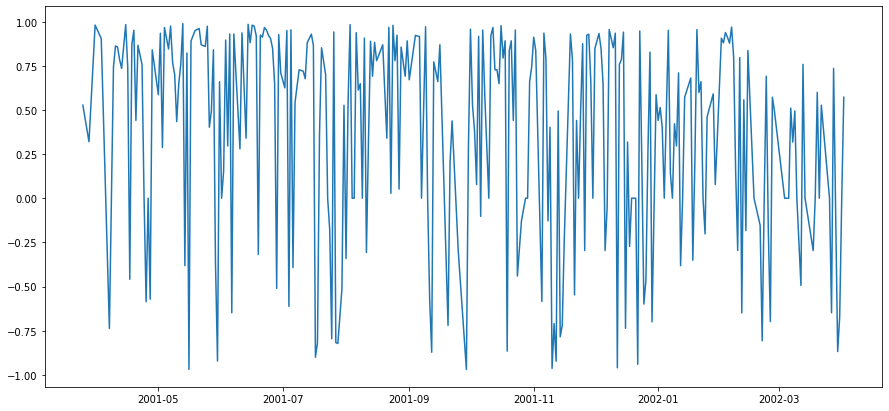

In [11]:
plt.figure(figsize=(15,7))
plt.plot(blogger_1270648['date'][:300], blogger_1270648['polarity_compound_post'][:300]);

In [12]:
np.mean(blogger_1270648['polarity_compound_post'])

0.30494699999999986

In [13]:
my_ts = blogger_1270648[['date', 'polarity_compound_post']]
my_ts

,date,polarity_compound_post
20696661,2001-03-25,0.5267
36481101,2001-03-28,0.3197
20638701,2001-03-31,0.9803
21527421,2001-04-03,0.9042
38896101,2001-04-07,-0.7371
...,...,...
1743741,2004-07-12,0.0000
681141,2004-07-16,0.0000
661821,2004-07-17,0.7351
623181,2004-07-20,-0.4215


In [14]:
blogger_1270648.columns

Index(['date', 'blogger_id', 'gender', 'age', 'occupation', 'name', 'post',
       'polarity_neg_post', 'polarity_pos_posts', 'polarity_neu_post',
       'polarity_compound_post', 'trust', 'fear', 'negative', 'sadness',
       'anger', 'surprise', 'positive', 'disgust', 'joy', 'anticipation'],
      dtype='object')

In [15]:
my_ts.set_index('date',inplace=True)

In [16]:
my_ts

,polarity_compound_post
date,
2001-03-25,0.5267
2001-03-28,0.3197
2001-03-31,0.9803
2001-04-03,0.9042
2001-04-07,-0.7371
...,...
2004-07-12,0.0000
2004-07-16,0.0000
2004-07-17,0.7351


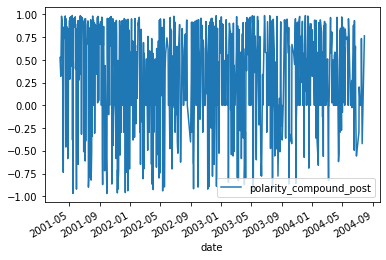

In [17]:
annual_temp = my_ts.resample('A').mean()
my_ts.plot();
#annual_temp.plot();

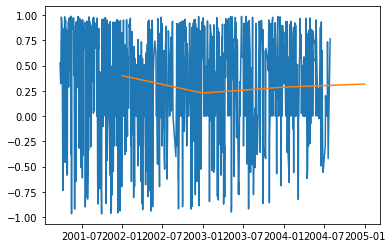

In [18]:
plt.plot(my_ts)
plt.plot(annual_temp);

In [19]:
import plotly.offline as off
import chart_studio.plotly as py
import plotly.graph_objs as go

data = [go.Scatter(x=annual_temp.index, y=annual_temp.polarity_compound_post)]
off.iplot(data)



ModuleNotFoundError: No module named 'chart_studio'

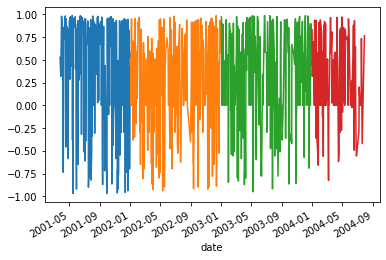

In [20]:
my_ts.resample('A').polarity_compound_post.plot();

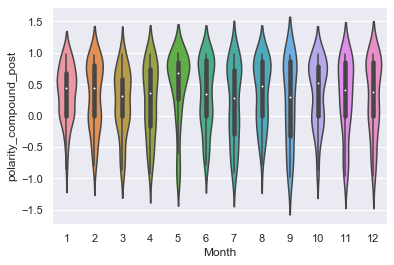

In [21]:
# violinplot months to determine variance and range
sns.set()
sns.violinplot(x=my_ts.index.month, y=my_ts.polarity_compound_post)
plt.xlabel("Month")
plt.ylabel("polarity_compound_post");

In [22]:
print(my_ts.polarity_compound_post.std())
print(my_ts.polarity_compound_post.diff().std())
print(my_ts.polarity_compound_post.diff().diff().std()) # theoretically lowest, but one above is close enough
print(my_ts.polarity_compound_post.diff().diff().diff().std())

0.5499224914014583
0.7363903239076378
1.2601962243512557
2.2961627589287628


In [23]:
print(annual_temp.polarity_compound_post.std()) # looks stationary as is
print(annual_temp.polarity_compound_post.diff().std())
print(annual_temp.polarity_compound_post.diff().diff().std())
print(annual_temp.polarity_compound_post.diff().diff().diff().std())

0.07167853990782926
0.12594449121379392
0.1831514195927326
nan


In [24]:
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

Test Statistic         -1.289529e+01
p-value                 4.361781e-24
Lags Used               3.000000e+00
Observations Used       7.960000e+02
Critical Value (1%)    -3.438592e+00
Critical Value (5%)    -2.865178e+00
Critical Value (10%)   -2.568707e+00
dtype: float64


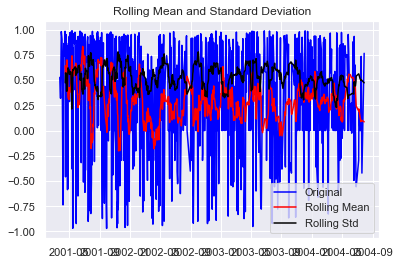

In [25]:
dftest(my_ts.polarity_compound_post) #data is stationary

In [26]:
my_ts.polarity_compound_post = my_ts.polarity_compound_post.diff()
my_ts = my_ts.iloc[1:,:]

In [27]:
#my_ts.polarity_compound_post = my_ts.polarity_compound_post.diff()
#my_ts = my_ts.iloc[1:,:]

In [28]:
#dftest(annual_temp.polarity_compound_post)

In [29]:
# define helper plot function for visualization
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw, figsize=(15,8))
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

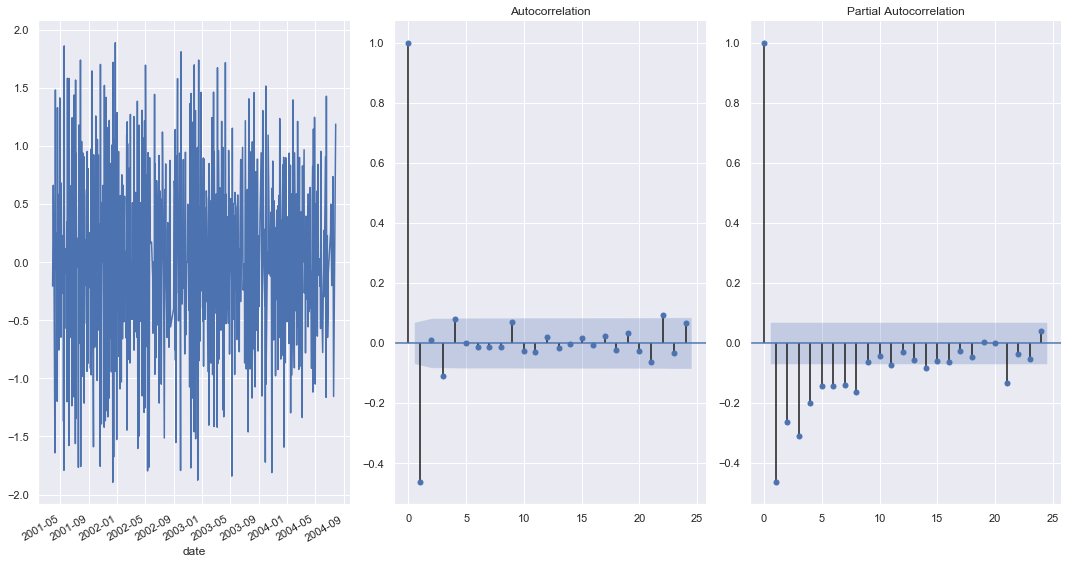

In [30]:
plots(my_ts.polarity_compound_post, lags=24);

In [31]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git
import statsmodels.api as sm

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(my_ts.polarity_compound_post, order=(3,0,0), 
                                seasonal_order=(0,0,0,0), trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     polarity_compound_post   No. Observations:                  799
Model:                   SARIMAX(3, 0, 0)   Log Likelihood                -723.199
Date:                    Thu, 11 Jun 2020   AIC                           1456.397
Time:                            18:59:09   BIC                           1479.814
Sample:                                 0   HQIC                          1465.394
                                    - 799                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0008      0.022     -0.037      0.971      -0.045       0.043
ar.L1         -0.6674      0.034    -19.856      0.000      -0.733      -0.602
ar.L2         -0.4424      0.039    -11.279      0.000      -0.519      -0.366
ar.L3         -0.3094      0.034     -9.035      0.000      -0.377      -0.242
sigma2         0.3575      0.020     17.674      0.000       0.318       0.397
===================================================================================
Ljung-Box (Q):                      101.64   Jarque-Bera (JB):                26.21
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.43
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

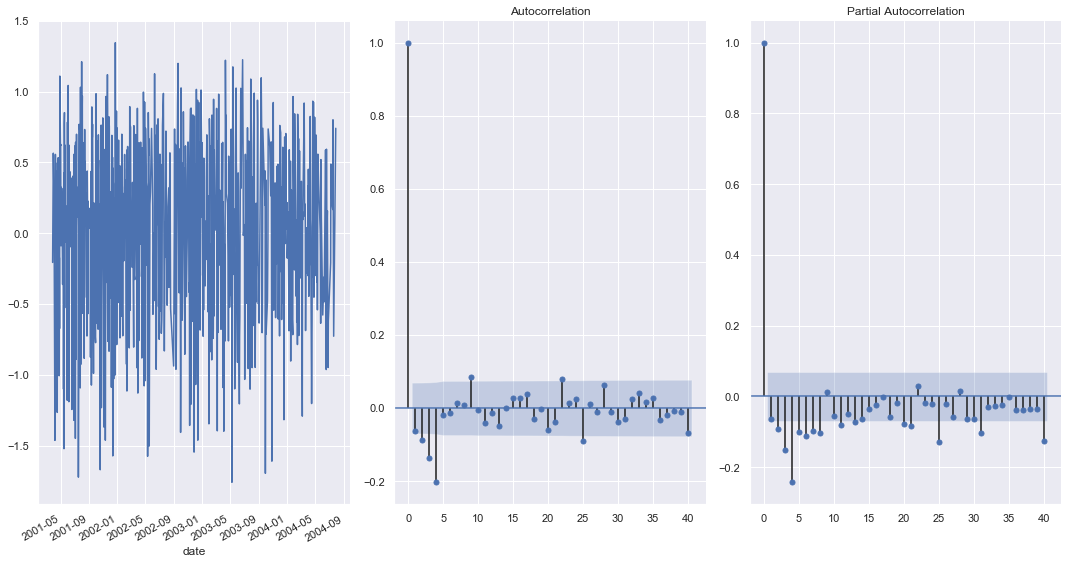

In [32]:
plots(sar.resid, lags=40);

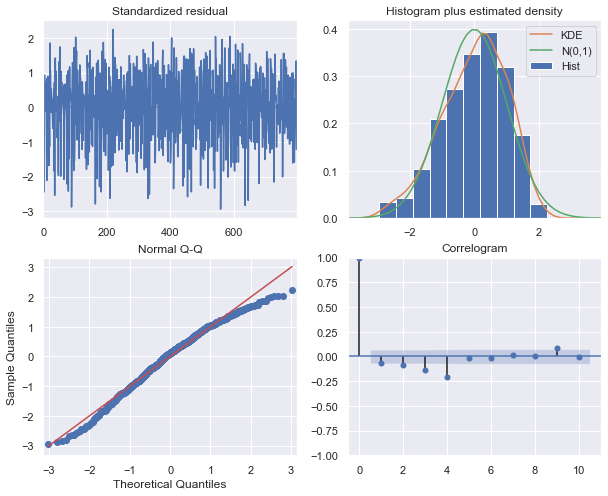

In [33]:
sar.plot_diagnostics(figsize=(10,8));

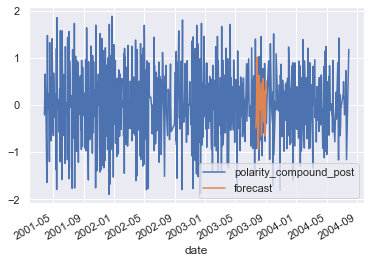

In [34]:
# plot predictions
my_ts['forecast'] = sar.predict(start = 600, end= 625, dynamic=30)  
my_ts[['polarity_compound_post', 'forecast']].plot();

# per the documentation, we start predicting at period 750, and start a dynamic forecast at 750 + 30
# this means we use our predictions as "ground truth" for following predictions

In [35]:
my_ts

,polarity_compound_post,forecast
date,,
2001-03-28,-0.2070,NaN
2001-03-31,0.6606,NaN
2001-04-03,-0.0761,NaN
2001-04-07,-1.6413,NaN
2001-04-09,1.4801,NaN
...,...,...
2004-07-12,-0.2023,NaN
2004-07-16,0.0000,NaN
2004-07-17,0.7351,NaN


In [36]:
my_ts[600:625]

,polarity_compound_post,forecast
date,,
2003-07-23,-0.0129,-0.484702
2003-07-25,-0.9158,-0.161256
2003-07-26,-0.9198,0.181648
2003-07-27,0.8426,1.022195
2003-07-28,0.0772,0.127117
2003-07-29,0.9477,-0.140520
2003-08-02,-0.3353,-0.928166
2003-08-04,-1.1698,-0.220197
2003-08-05,1.0341,0.635011


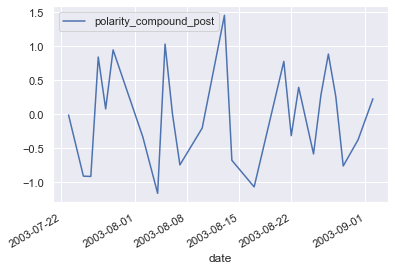

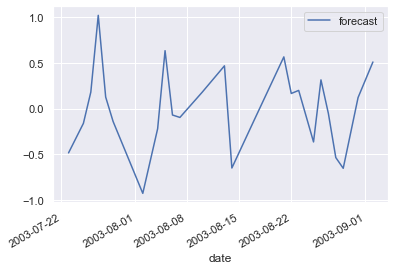

In [37]:
my_ts[600:625][['polarity_compound_post']].plot();
my_ts[600:625][['forecast']].plot();

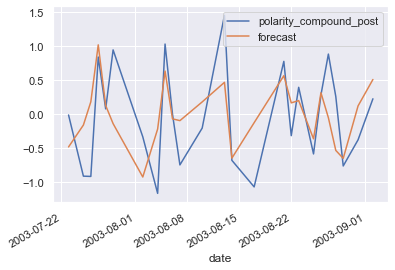

In [38]:
my_ts[600:625][['polarity_compound_post', 'forecast']].plot();

In [39]:
# create and run statistical tests on model
norm_val, norm_p, skew, kurtosis = sar.test_normality('jarquebera')[0]
lb_val, lb_p = sar.test_serial_correlation(method='ljungbox')[0]
het_val, het_p = sar.test_heteroskedasticity('breakvar')[0]
# we want to look at largest lag for Ljung-Box, so take largest number in series
# there's intelligence in the method to determine how many lags back to calculate this stat
lb_val = lb_val[-1]
lb_p = lb_p[-1]
durbin_watson = sm.stats.stattools.durbin_watson(sar.filter_results.standardized_forecasts_error[0, sar.loglikelihood_burn:])

print('Normality: val={:.3f}, p={:.3f}'.format(norm_val, norm_p));
print('Ljung-Box: val={:.3f}, p={:.3f}'.format(lb_val, lb_p));
print('Heteroskedasticity: val={:.3f}, p={:.3f}'.format(het_val, het_p));
print('Durbin-Watson: d={:.2f}'.format(durbin_watson))

Normality: val=26.208, p=0.000
Ljung-Box: val=101.636, p=0.000
Heteroskedasticity: val=0.905, p=0.417
Durbin-Watson: d=2.12


# Profet

In [47]:
from fbprophet import Prophet

In [48]:
df_r = my_ts.iloc[:,:2].reset_index()

In [49]:
df_r.rename(columns={'date':'ds', 'polarity_compound_post':'y'}, inplace=True)

In [50]:
df_r

,ds,y,forecast
0,2001-03-28,-0.2070,NaN
1,2001-03-31,0.6606,NaN
2,2001-04-03,-0.0761,NaN
3,2001-04-07,-1.6413,NaN
4,2001-04-09,1.4801,NaN
...,...,...,...
794,2004-07-12,-0.2023,NaN
795,2004-07-16,0.0000,NaN
796,2004-07-17,0.7351,NaN
797,2004-07-20,-1.1566,NaN


In [51]:
model_r = Prophet()
model_r.fit(df_r)

#Prophet(daily_seasonality = True, yearly_seasonality = False, weekly_seasonality = True,
                #seasonality_mode = 'multiplicative', 
                #interval_width = interval_width,
                #changepoint_range = changepoint_range)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
future_r = model_r.make_future_dataframe(periods=365)
forecast_r = model_r.predict(future_r)

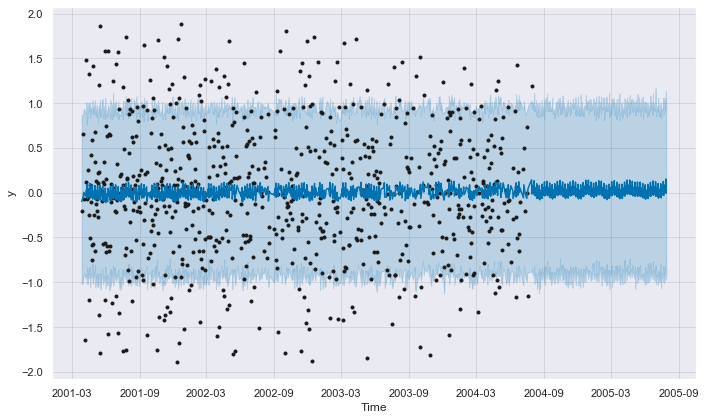

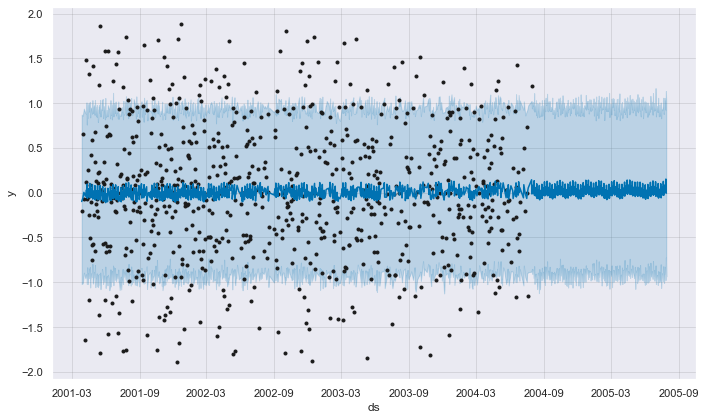

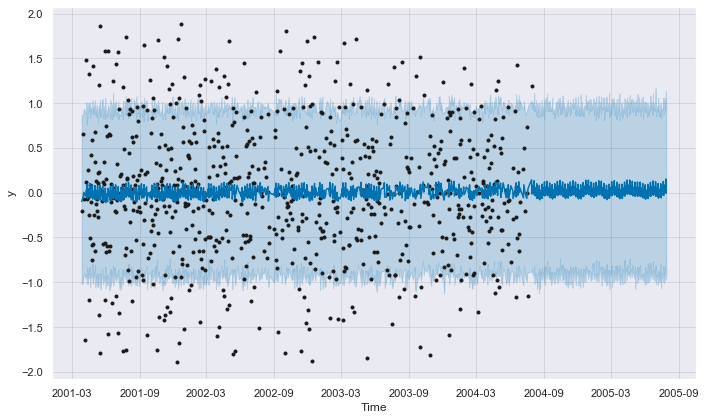

In [53]:
fig = model_r.plot(forecast_r)
model_r.plot(forecast_r, xlabel='Time')

# Pyflux

In [54]:
#!pip install git+https://github.com/RJT1990/pyflux
import pyflux as pf

In [55]:
# define helper plot function for visualing ACF and PACF plots
import seaborn as sns
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    
    plt.figure(figsize=(8,4))
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw)
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

In [56]:
df_r

,ds,y,forecast
0,2001-03-28,-0.2070,NaN
1,2001-03-31,0.6606,NaN
2,2001-04-03,-0.0761,NaN
3,2001-04-07,-1.6413,NaN
4,2001-04-09,1.4801,NaN
...,...,...,...
794,2004-07-12,-0.2023,NaN
795,2004-07-16,0.0000,NaN
796,2004-07-17,0.7351,NaN
797,2004-07-20,-1.1566,NaN


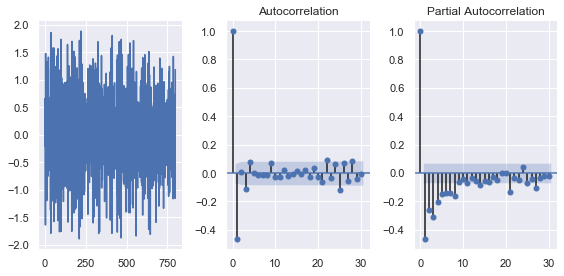

In [57]:
plots(df_r.y)

In [58]:
# Instantiate ARIMA model, we could include additional features in the "formula" parameter if we had them
model = pf.ARIMAX(data=df_r,formula='y~1',ar=2,ma=0, integ=1)
fit_model = model.fit()
fit_model.summary()

Normal ARIMAX(2,1,0)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced y                       Method: MLE                                       
Start Date: 2                                           Log Likelihood: -1007.77                          
End Date: 798                                           AIC: 2023.5401                                    
Number of observations: 796                             BIC: 2042.2585                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    -0.9398    0.0322     -29.1658 0.0      (-1.0029 | -0.8766)      
AR(2)                                

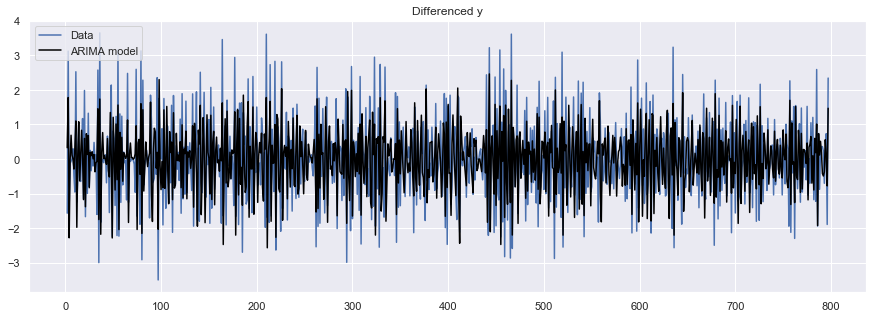

In [59]:
# Plot the model results
model.plot_fit(figsize=(15,5))

In [62]:
df_r

,ds,y,forecast
0,2001-03-28,-0.2070,NaN
1,2001-03-31,0.6606,NaN
2,2001-04-03,-0.0761,NaN
3,2001-04-07,-1.6413,NaN
4,2001-04-09,1.4801,NaN
...,...,...,...
794,2004-07-12,-0.2023,NaN
795,2004-07-16,0.0000,NaN
796,2004-07-17,0.7351,NaN
797,2004-07-20,-1.1566,NaN


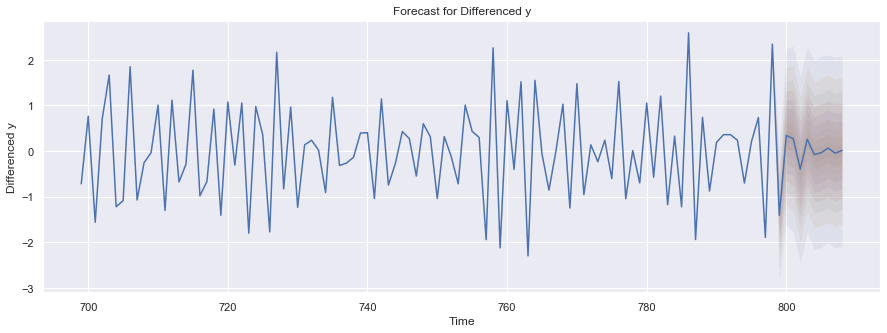

In [61]:
# Forecast going forward!
model.plot_predict(h=10,oos_data=df_r, past_values=100,figsize=(15,5))

In [ ]:
blogger_1270648

In [40]:
plutchik = blogger_1270648[['date','trust', 'fear', 'sadness',
       'anger', 'surprise', 'disgust', 'joy', 'anticipation']]

In [35]:
#plutchik = plutchik.set_index('date')

In [42]:
plutchik['trust_change'] = plutchik['trust'] - plutchik['trust'].shift(1)
plutchik['fear_change'] = plutchik['fear'] - plutchik['fear'].shift(1)
plutchik['sadness_change'] = plutchik['sadness'] - plutchik['sadness'].shift(1)
plutchik['anger_change'] = plutchik['anger'] - plutchik['anger'].shift(1)
plutchik['surprise_change'] = plutchik['surprise'] - plutchik['surprise'].shift(1)
plutchik['disgust_change'] = plutchik['disgust'] - plutchik['disgust'].shift(1)
plutchik['joy_change'] = plutchik['joy'] - plutchik['joy'].shift(1)
plutchik['anticipation_change'] = plutchik['anticipation'] - plutchik['anticipation'].shift(1)

In [45]:
plutchik

,date,trust,fear,sadness,anger,surprise,disgust,joy,anticipation,trust_change,fear_change,sadness_change,anger_change,surprise_change,disgust_change,joy_change,anticipation_change
17890962,2000-08-10,0.006955,0.005746,0.005443,0.005141,0.007560,0.003327,0.007258,0.008165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17871642,2000-08-11,0.000605,0.000000,0.000000,0.000000,0.000302,0.000000,0.000605,0.000302,-0.006351,-0.005746,-0.005443,-0.005141,-0.007258,-0.003327,-0.006653,-0.007863
17852322,2000-08-14,0.001814,0.000907,0.000605,0.000605,0.000907,0.000302,0.001210,0.001210,0.001210,0.000907,0.000605,0.000605,0.000605,0.000302,0.000605,0.000907
17833002,2000-08-15,0.000302,0.000605,0.001210,0.000907,0.000000,0.000605,0.000605,0.000907,-0.001512,-0.000302,0.000605,0.000302,-0.000907,0.000302,-0.000605,-0.000302
17813682,2000-08-16,0.000302,0.000000,0.000000,0.000000,0.000605,0.000302,0.000605,0.000605,0.000000,-0.000605,-0.001210,-0.000907,0.000605,-0.000302,0.000000,-0.000302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135882,2004-06-30,0.004839,0.002117,0.001512,0.001512,0.003327,0.000907,0.006955,0.006048,0.004839,0.002117,0.001512,0.001512,0.003327,0.000907,0.006955,0.006048
657522,2004-07-17,0.000302,0.000605,0.000302,0.000000,0.000302,0.000000,0.000907,0.000302,-0.004536,-0.001512,-0.001210,-0.001512,-0.003024,-0.000907,-0.006048,-0.005746
2686122,2004-07-19,0.000000,0.000000,0.000302,0.000000,0.000302,0.000302,0.000000,0.000302,-0.000302,-0.000605,0.000000,0.000000,0.000000,0.000302,-0.000907,0.000000
618882,2004-07-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000302,0.000000,-0.000302,-0.000302,0.000000,-0.000302


In [43]:
df = pd.melt(plutchik, id_vars=['date'], value_vars=['trust', 'fear', 'sadness',
       'anger', 'surprise', 'disgust', 'joy', 'anticipation'])

In [48]:
df2 = pd.melt(plutchik, id_vars=['date'], value_vars=['trust_change', 'fear_change', 'sadness_change',
       'anger_change', 'surprise_change', 'disgust_change', 'joy_change', 'anticipation_change'], value_name='change')

In [31]:
df = df.sort_values(by=['date'])

In [51]:
df2['variable'] = df2['variable'].str.replace('_change', '')

In [54]:
new_df = pd.merge(df, df2,  how='left', left_on=['date','variable'], right_on = ['date','variable'])

In [61]:
new_df.dropna(axis=0, inplace=True)

In [64]:
new_df = new_df.sort_values('date')

In [65]:
new_df

,date,variable,value,change
1,2000-08-11,trust,0.000605,-0.006351
1259,2000-08-11,sadness,0.000000,-0.005443
1888,2000-08-11,anger,0.000000,-0.005141
2517,2000-08-11,surprise,0.000302,-0.007258
3146,2000-08-11,disgust,0.000000,-0.003327
...,...,...,...,...
1886,2004-07-27,sadness,0.000605,0.000605
1257,2004-07-27,fear,0.001814,0.001814
628,2004-07-27,trust,0.000302,0.000302
4402,2004-07-27,joy,0.000302,0.000302


In [68]:
with open('blogger_1270648_long.pkl', 'wb') as picklefile:
    pickle.dump(new_df, picklefile)

In [67]:
!pwd

/Users/elena/Desktop/Metis/projects/5_project/Blogger_Boost/code
